# Assignment No 04

# Problem Statement :: Data Analytics I
Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features.


In [46]:
# 'crim': per capita crime rate by town.
# 'zn': proportion of residential land zoned for lots over 25,000 sq.ft.
# 'indus': proportion of non-retail business acres per town.
# 'chas':Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# 'nox': nitrogen oxides concentration (parts per 10 million).
# 'rm': average number of rooms per dwelling.
# 'age': proportion of owner-occupied units built prior to 1940.
# 'dis': weighted mean of distances to five Boston employment centres.
# 'rad': index of accessibility to radial highways.
# 'tax': full-value property-tax rate per $10,000.
# 'ptratio': pupil-teacher ratio by town
# 'black': 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# 'lstat': lower status of the population (percent).
# 'medv': median value of owner-occupied homes in $$1000s

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
df = pd.read_csv("C:/Users/91862/Desktop/DATASCIENCECODES//train(Boston).csv") 

In [48]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [16]:
df.shape

(333, 15)

In [17]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


<Axes: >

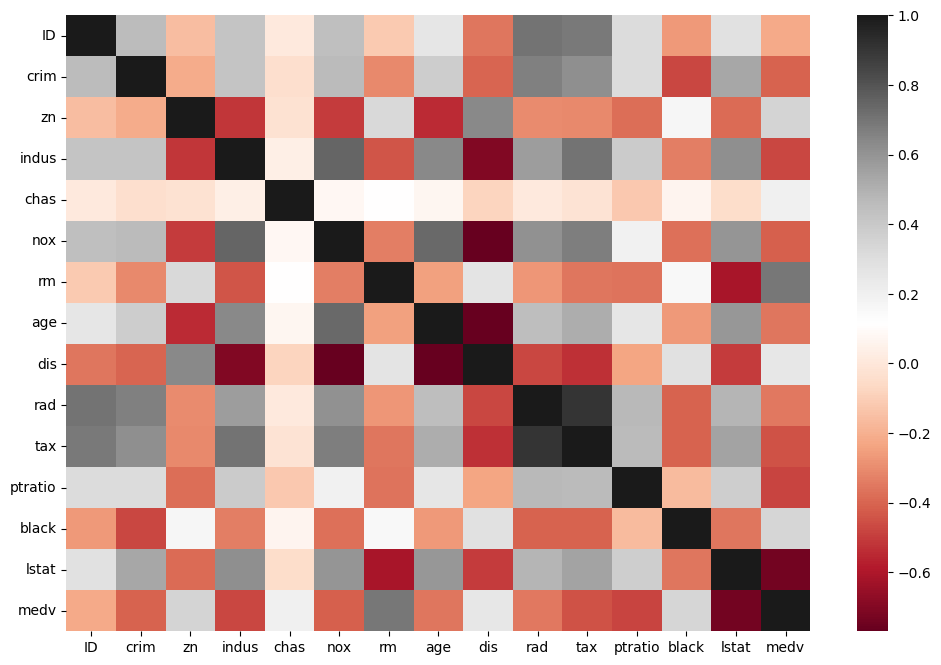

In [19]:
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'RdGy')

where y = medv:

When shades of Red/Orange: the more red the color is on X axis, smaller the medv. Negative correlation
When light colors: those variables at axis x and y, they dont have any relation. Zero correlation
When shades of Gray/Black : the more black the color is on X axis, more higher the value med is. Positive correlation

In [51]:
#X: independent variables
#Y: dependent variable
    
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = df['medv']

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [53]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Predicted Y')

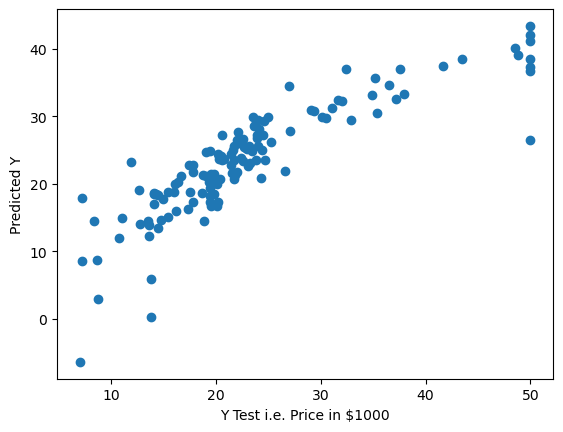

In [54]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test i.e. Price in $1000')
plt.ylabel('Predicted Y')

In [55]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 24.60565170053364
RMSE: 4.960408420738522


C:\Users\91862\AppData\Local\Temp\ipykernel_13032\1061164399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50)


<Axes: xlabel='medv', ylabel='Density'>

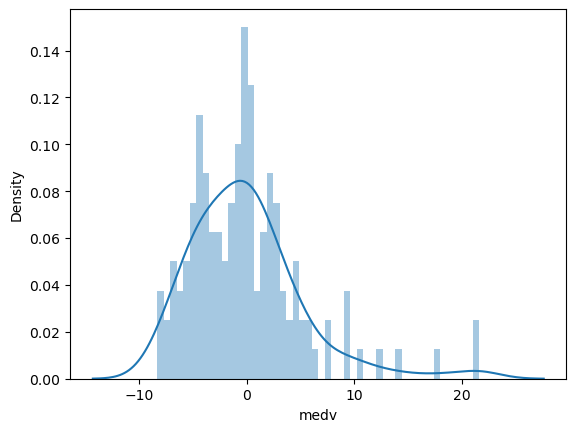

In [50]:
sns.distplot((y_test-predictions),bins=50)